# Анализ данных пассажиров Титаника

Рассмотрим предварительную обработку данных.

* Данные взяты из игрушечного соревнования "Титаник" на платформе kaggle https://www.kaggle.com/c/titanic
* Целью соревнования было построить модель, которая определяет, какие пассажиры выжили, а какие нет после кораблекрушения Титаника.
* Данные в этом соревновании содержат многие проблемы, с которыми обычно сталкиваются те, кто анализирует данные.
* За основу взята тетрадь  https://www.kaggle.com/omarelgabry/a-journey-through-titanic от Омара Эль Габри.

Тетрадь содержит материалы:
* Введение
* Импорт библиотек
* Обзор данных
* Удаление признаков
* Предварительная обработка признаков

Какиех-то готовых **универсальных** шаблонов по предварительному анализу данных нет. Для каждой задачи и данных этапы анализа могут довольно существенно отличаться. Однако, несмотря на это, можно выделить основные **ключевые** вехи работы с новым **табличным** набором данных, вне зависимости от поставленной задачи.

## Импорт пакетов

Публичные ядра на kaggle чаще всего используют:
* 93% pandas
* 89% numpy
* 59% matplotlib
* <50% остальные пакеты


* 11.7% XGBoost
* 2.8% TensorFlow 
* 2.1% sklearn 
* 0.9% Keras 

# Импорт библиотек

In [2]:
# обработка и хранение данных
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [1]:
# визуализация
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Загрузка данных

In [3]:
# machine learning tools: various methods from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Загрузка данных из csv файла
titanic_dataframe = pd.read_csv("data/titanic_data.csv")

# Теперь посмотрим на данные

In [34]:
# Посмотреть размерность таблицы - атрибут shape
titanic_dataframe.shape

(891, 8)

In [14]:
# Вывести на экран первые несколько столбцов таблицы - функция head()
titanic_dataframe.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [8]:
# Список признаков (столбцов) - keys()
print(titanic_dataframe.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Описание данных

| Переменная | Значение | Ключ |
| ------------- |:-------------|: -----|
| survival | Выжил?   | 0 = No, 1 = Yes | 
| pclass   | Класс | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Пол | |
| Age | Возраст в годах | |
| sibsp | # братьев, сестер и супругов на борту Титаника | |
| parch | # родителей и детей на борту Титаника | |
| ticket | Номер билета  | |
| fare   | Цена билета | |
| cabin  | Номер каюты | |
| embarked | Порт посадки | C = Cherbourg, Q = Queenstown, S = Southampton |

In [8]:
# Информация по таблице
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# Статистические показатели по столбцам таблицы
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Применение условий

In [42]:
len(men_death)

577

## Удаление столбцов из данных

In [11]:
# получение информации по интересующей функции
titanic_dataframe.drop?

In [5]:
# Выкинуть из таблицы столбцы 'PassengerId','Name','Ticket' и вывести информацию по получившейся таблице
titanic_dataframe.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [29]:
# Вывести на экран количество пропущенных значений в абсолютном и относительном порядке
for column_name in titanic_dataframe.columns:
    print('{} {} {} \t {:.1f} %'.format(
        column_name,
        ' '*(12 - len(column_name)),
        titanic_dataframe[column_name].isnull().sum(), 
        titanic_dataframe[column_name].isnull().sum() / titanic_dataframe.shape[0])
         )

Survived      0 	 0.0 %
Pclass        0 	 0.0 %
Sex           0 	 0.0 %
Age           177 	 0.2 %
SibSp         0 	 0.0 %
Parch         0 	 0.0 %
Fare          0 	 0.0 %
Cabin         687 	 0.8 %
Embarked      2 	 0.0 %


In [6]:
# Удалить столбец с максимальным количеством пропусков
titanic_dataframe.drop("Cabin", axis=1, inplace=True)

# Обработка признаков

### Обработка признака "порт отплытия"

In [7]:
# Вывести количество уникальных значений поля 'Embarked'
print(titanic_dataframe["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
# Заполнить пропущенные значения символом "S"
titanic_dataframe["Embarked"].fillna("S", inplace=True)
print(titanic_dataframe["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
titanic_dataframe[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


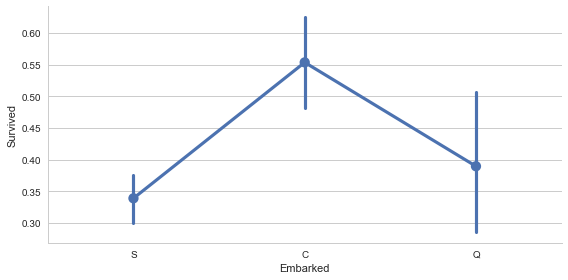

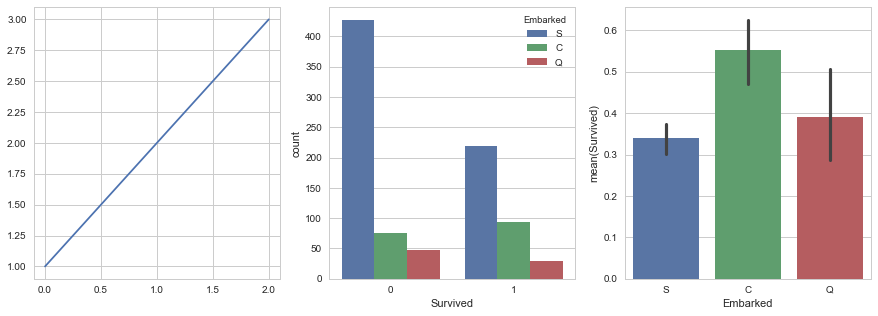

In [21]:
# Factor plot represents share of survived passangers for different embarkment ports
sns.factorplot('Embarked', 'Survived', data=titanic_dataframe, size=4, aspect=2)

figure_handle, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
axis1.plot([1, 2, 3])
# sns.countplot(x='Embarked', data=titanic_dataframe, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_dataframe, order=[0, 1], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
# embark_percentage = titanic_dataframe[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
# sns.barplot(x='Embarked', y='Survived', data=embark_percentage, order=['S','C','Q'], ax=axis3)
sns.barplot(x='Embarked', y='Survived', data=titanic_dataframe[["Embarked", "Survived"]], order=['S','C','Q'], ax=axis3)

In [10]:
# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_dataframe['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(embark_dummies_titanic)

titanic_dataframe.drop(['Embarked'], axis=1, inplace=True)

In [11]:
titanic_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22.0,1,0,7.2500,0,0
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,0,0
3,1,1,female,35.0,1,0,53.1000,0,0
4,0,3,male,35.0,0,0,8.0500,0,0


### Обработка признака "цена билета"

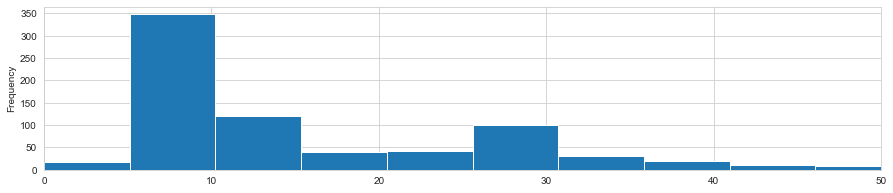

In [12]:
# Преобразование в int
titanic_dataframe['Fare'] = titanic_dataframe['Fare'].astype(int)

# Стоимость билетов для выживших и невыживших
fare_not_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 0]
fare_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 1]

# Получение среднего и стандартного отклонения
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# Отрисовка результатов
titanic_dataframe['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50));

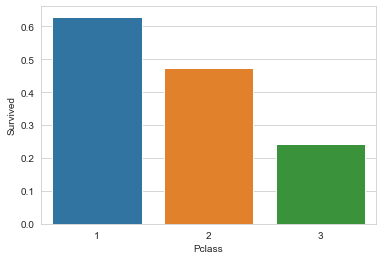

In [13]:
# Do the same thing for pclass variable with no confidence interval visible
sns.barplot(x='Pclass', y='Survived', data=titanic_dataframe[["Pclass", "Survived"]], order=[1, 2, 3], ci=None);

### Обработка признака "возраст"

In [14]:
'''
Посчитать и вывести на экран: 
- среднее
- отклонение
- количество пропущенных значений
Для поля Возраст
''' 
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()
count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()

print('Средний возраст = {:.2f}'.format(average_age_titanic))
print('Стандартное отклонение = {:.2f}'.format(std_age_titanic))
print('Количество пропущенных значений = {}'.format(count_nan_age_titanic))

Средний возраст = 29.70
Стандартное отклонение = 14.53
Количество пропущенных значений = 177


In [15]:
# При помощи библиотеки numpy и модуля random сгенерировать список значений возрастов размерности количества NaN
random_ages = np.random.randint(average_age_titanic - std_age_titanic, 
                                average_age_titanic + std_age_titanic, 
                                size=count_nan_age_titanic)

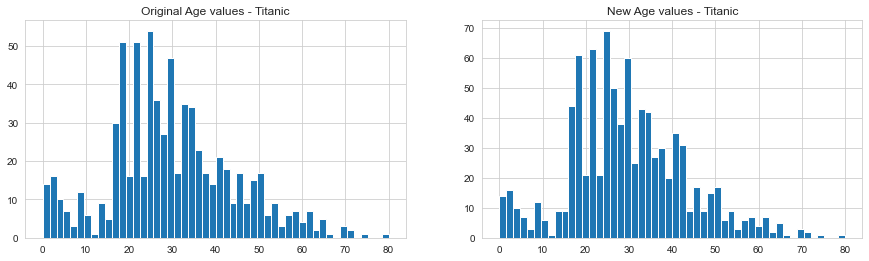

In [16]:
# Создание полотна для последующих графиков
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# Построить гистограмму возрастов без NaN (убрать все NaN при помощи dropna() и преобразовать в int при помощи astypy(int))
titanic_dataframe['Age'].dropna().astype(int).hist(bins=50, ax=axis1);

# Заполнить пропущенные значения
titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages

# Преобразовать в Int
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

# Отрисовать гистограмму распределения с новыми значениями
titanic_dataframe['Age'].hist(bins=50, ax=axis2);

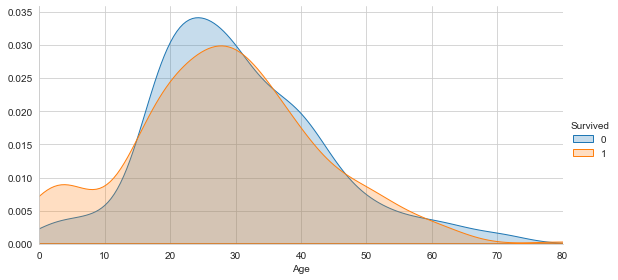

In [17]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_dataframe, hue="Survived", height=4, aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic_dataframe['Age'].max()))
facet.add_legend();

### Обработка признаков, связанных с семейным положением

In [18]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column that represents if a passenger had any family member aboard or not,
# Meaning, if having any family member (whether parent, brother, ...etc) increases chances of Survival or not.
titanic_dataframe['Family'] = titanic_dataframe["Parch"] + titanic_dataframe["SibSp"]
titanic_dataframe.loc[titanic_dataframe['Family'] > 0, 'Family'] = 1
titanic_dataframe.loc[titanic_dataframe['Family'] == 0, 'Family'] = 0

# drop Parch & SibSp
titanic_dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)

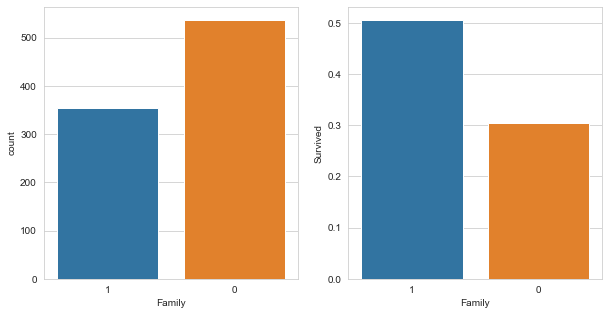

In [19]:
# plot Family
figure_handle, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(x='Family', data=titanic_dataframe, order=[1, 0], ax=axis1)
axis1.set_xticklabels(["With Family", "Alone"], rotation=0);

# average of survived for those who had/didn't have any family member
sns.barplot(x='Family', y='Survived', data=titanic_dataframe[["Family", "Survived"]], order=[1, 0], ax=axis2, ci=None);

### Обработка признака "Пол"

#### Определение функций в Python

* В Python можно определить функцию с помощью команды `def`.
* Однострочную функцию можно определять с помощью команды `lambda`.

Для комментирования функций лучше всего использовать docstrings https://www.python.org/dev/peps/pep-0257/

Уровень мужской смертности 81.11 %
Уровень женской смертности 25.80 %


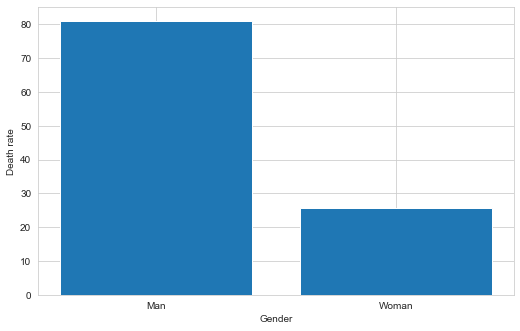

In [20]:
# Записать в переменные информацию по мужчинам и женщинам
men_death = titanic_dataframe.loc[titanic_dataframe.Sex=='male']["Survived"]
men_death_rate = (1 - sum(men_death)/len(men_death))*100
women_death = titanic_dataframe.loc[titanic_dataframe.Sex=='female']["Survived"]
women_death_rate = (1 - sum(women_death)/len(women_death))*100


X = ['Man', 'Woman']
Y = [men_death_rate,women_death_rate]
fig = plt.figure()
ax = fig.add_axes([0,0,1.1,1])
ax.bar(X,Y)
plt.ylabel('Death rate')
plt.xlabel('Gender')

print("Уровень мужской смертности {:.2f} %".format(men_death_rate))
print("Уровень женской смертности {:.2f} %".format(women_death_rate))
plt.show()

In [21]:
# Как видно по графикам из предыдущего пункта, у пассажиров с возрастом меньше 16 лет, шансы выжить выше
def get_person(passenger, child_age=16):
    age, sex = passenger
    return 'child' if age < child_age else sex
  
# Сделайте то же самое при помощи lambda-выражения

In [22]:
person_dummies_titanic

NameError: name 'person_dummies_titanic' is not defined

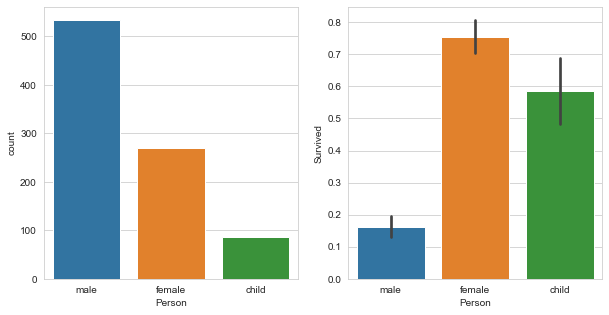

In [23]:
titanic_dataframe['Person'] = titanic_dataframe[['Age', 'Sex']].apply(get_person, axis=1)

# Удалить столбец "Пол"
titanic_dataframe.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_dataframe['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(person_dummies_titanic)

figure_handle, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Person', data=titanic_dataframe, ax=axis1)

# average of survived for each Person(male, female, or child)
sns.barplot(x='Person', y='Survived', data=titanic_dataframe[["Person", "Survived"]], 
            ax=axis2, order=['male', 'female', 'child'])

# we don't need person variable after introduction of the corresponding dummy variables
titanic_dataframe.drop(['Person'], axis=1, inplace=True)

C:\Users\DPerets\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DPerets\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DPerets\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


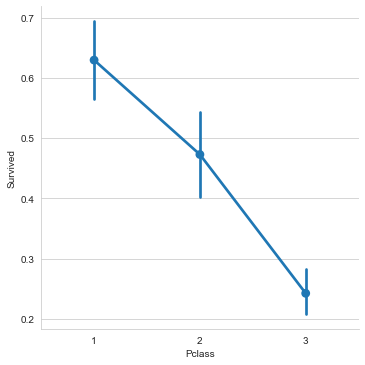

In [24]:
# Pclass
sns.factorplot('Pclass', 'Survived', order=[1, 2, 3], data=titanic_dataframe, size=5)

# The goal is to create dummy variables for class and joint it to the initial dataframe
# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_dataframe['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(pclass_dummies_titanic)

titanic_dataframe.drop(['Pclass'], axis=1, inplace=True)

In [25]:
titanic_dataframe.to_pickle('data/titanic_clean.pickle')
titanic_dataframe.to_csv('data/titanic_clean.csv')